# Dominic's Final Project - EMS Data & Injury - 12.11.23

The purpose of this analysis is to understand and attempt to answer the question, "Have the number and type of injuries in the EMS field affected the number of people pursuing a career in the field?" 

I am pursuing this question and analysis because of the personal connection and purpose it has in my own life. I am currently a 3rd generation EMT pursuing my career and soon-to-be firefighter. I understand the risks associated with the profession; however, I also understand the importance of the profession and the duty to serve the community and help others. Unfortunately, it seems there are not as many people pursuing the career as there were many years ago. 

Thus, for this analysis, my goal is to understand how enrollment in the EMS field has changed and if it correlates with the risk of injuries in the field.

The following data has been collected from the US Bureau of Labor Statistics and the CDC. It is valuable as these are government sources that do consistent research in the field of EMS. Government sources are valuable for several reasons including providing information in a neutral and unbiased manner, keeping official records of various activities, being accountable for providing accurate information for maintaining trust, and more. 

Nevertheless, it's essential to approach any information, including from government sources, with a critical mindset. Governments can sometimes be subject to pressure and the accuracy of information may vary across different agencies.

Lastly, each of the sets were copied them into an Excel sheet and modified for better visualization.

In [106]:
#import essential Python libraries

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats

## The following data here is collected from the US Bureau of Labor Statistics

https://www.bls.gov/ooh/healthcare/emts-and-paramedics.htm#tab-6

In [107]:
#EMS Projections

ems_projections = pd.read_csv('Employment Projections for EMTs and Paramedics, 2022-32.csv') 

In [108]:
ems_projections

,Occupational Title,"Employment, 2022","Projected Employment, 2032","Change, 2022-32 (Numeric)","Change, 2022-32 (Percentage)"
0,Emergency Medical Technicians and Paramedics,"269,000","283,600","14,600",5
1,Emergency Medical Technicians,"170,700","180,000","9,300",5
2,Paramedics,"98,300","103,600","5,300",5


The following section of code you will see throughout the report. This code creates a new column in the DataFrame and assigns it to the cleaned data. Since the data I am working with contains numbers in the thousands, the numerical data is stored as a string with a comma. Before we can use these values we need to remove that comma and convert that data to an integer (instead of a string). The code takes the comma in the string and replaces it with nothing, essentially removing the comma. Then, int() changes the data type to an integer instead of a string so you can use that data in the figures. 

Credit to Dr. David Silva for this portion of code, guidance, and direction!!

In [109]:
ems_projections['Employment, 2022'] = [int(x.replace(',', '')) 
                                       for x in ems_projections['Employment, 2022']] 

In [110]:
ems_projections['Projected Employment, 2032'] = [int(x.replace(',', '')) 
                                                 for x in ems_projections['Projected Employment, 2032']]

## The following data here is collected from the CDC

https://www.cdc.gov/niosh/topics/ems/data.html#print

In [111]:
#Body Part Affected

ems_injuries_bodypart = pd.read_csv('EMS Injury (Body Part).csv')

In [112]:
ems_injuries_bodypart

,Body Part Affected,Count (1)
0,Total,"12,500"
1,"Leg, including foot","3,200"
2,"Upper trunk, inc. neck & shoulder","3,000"
3,Arm,"2,200"
4,Lower trunk,"2,200"
5,Hand & finger,"1,900"


In [113]:
ems_injuries_bodypart['Count'] = [int(x.replace(',', '')) for x in ems_injuries_bodypart['Count (1)']]

In [114]:
#Event that occured to the EMS Responder

ems_injuries_event = pd.read_csv('EMS Injury (event).csv')

In [115]:
ems_injuries_event

,Event,Count (3)
0,Total,"16,900"
1,Overexertion & bodily reaction,"5,200"
2,Violence,"3,000"
3,Harmful exposures,"2,500"
4,Transportation incidents,"2,500"
5,Contact with objects & equipment,"2,100"
6,"Falls, slips, trips","1,600"


In [116]:
ems_injuries_event['Count'] = [int(x.replace(',', '')) for x in ems_injuries_event['Count (3)']]

In [117]:
#Source of the injury that occured to the EMS Responder

ems_injuries_source = pd.read_csv('EMS Injury (Source).csv')

In [118]:
ems_injuries_source

,Source,Count (4)
0,Total,"14,900"
1,"Persons, plants, animals, & minerals","9,000"
2,Vehicles,"4,100"
3,"Tools, instruments, and equipment","1,800"


In [119]:
ems_injuries_source['Count'] = [int(x.replace(',', '')) for x in ems_injuries_source['Count (4)']]

## Analyzing & Plotting the Data

In the following section of my report, I will describe and begin to interpret the data. To understand my goal of how enrollment in the EMS field has changed and if it correlates with the risk of injuries in the field, I plan to use bar plots to visualize the data. I am choosing a bar plot because since I have multiple, separate sets of data that are already interpreted (data that is not raw), I can use the data that has been organized to group the different data sets. I hope to visualize how the data from these different sets might correlate.

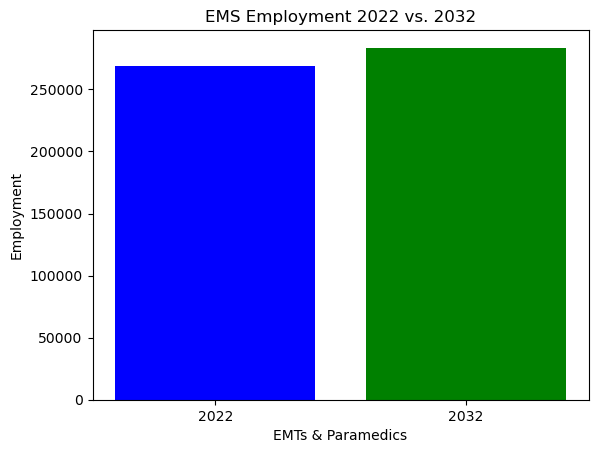

In [120]:
fig1, ax1 = plt.subplots()

ax1.bar(x = [0], height = ems_projections['Employment, 2022'], color = 'b')
ax1.bar(x = [1], height = ems_projections['Projected Employment, 2032'], color = 'g')

plt.title('EMS Employment 2022 vs. 2032') 
plt.xlabel('EMTs & Paramedics')
plt.ylabel('Employment')

year = ['2022', '2032']
plt.xticks([0, 1], year)

plt.show()

The above bar plot shows the number of EMTs and Paramedics who entered the field of EMS in 2022 vs 2032. As we can tell from the bar plot and the previous data set from the US Bureau of Labor Statistics, the number of EMTs and Paramedics is expected to grow at a margin of around 5%. 

Nevertheless, there are some inadequacies with this data that affect the answer to my question of whether the number and type of injuries in the EMS field affected the number of people pursuing a career in the field. The data is inadequate because, at the time of this report (2023), we have not yet reached the year 2032. We do not know for sure if the number of EMTs and Paramedics will reach this number or increase to around 5% in 2032. Yet, to answer my question, I will continue to use this data to compare it to the number and type of injuries in the EMS in an attempt to understand if it affects people pursuing the career.

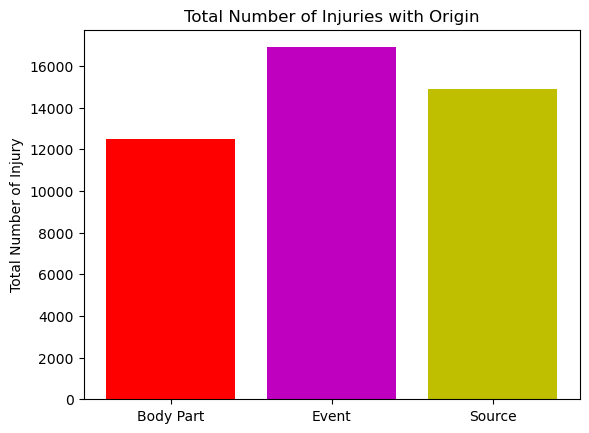

In [121]:
fig2, ax2 = plt.subplots()

ax2.bar(x = [1], height = ems_injuries_bodypart['Count'], color = 'r')
ax2.bar(x = [2], height = ems_injuries_event['Count'], color = 'm')
ax2.bar(x = [3], height = ems_injuries_source['Count'], color = 'y')

plt.title('Total Number of Injuries with Origin') 
plt.ylabel('Total Number of Injury')

orgin = ['Body Part', 'Event', 'Source']
plt.xticks([1, 2, 3], orgin)

plt.show()

The above chart plots the total number of injuries that occurred in the EMS related to body parts, the event that occurred, and the source of the event. The data loaded previously demonstrates the breakdown of these injuries; however, for this report, I have calculated the total of each category and graphed these together.

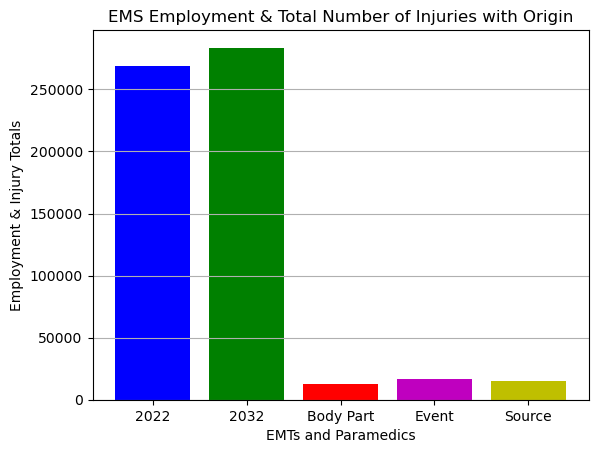

In [122]:
fig3, ax3 = plt.subplots()

ax3.bar(x = [1], height = ems_projections['Employment, 2022'], color = 'b')
ax3.bar(x = [2], height = ems_projections['Projected Employment, 2032'], color = 'g')
ax3.bar(x = [3], height = ems_injuries_bodypart['Count'], color = 'r')
ax3.bar(x = [4], height = ems_injuries_event['Count'], color = 'm')
ax3.bar(x = [5], height = ems_injuries_source['Count'], color = 'y')

plt.title('EMS Employment & Total Number of Injuries with Origin') 
plt.xlabel('EMTs and Paramedics')
plt.ylabel('Employment & Injury Totals')
plt.grid(axis='y')

complete = ['2022', '2032','Body Part', 'Event', 'Source']
plt.xticks([1, 2, 3, 4, 5], complete)

plt.show()

This final bar chart compares the two previous coded charts. While there may be some challenges and limitations to the data, using the data that I have allows me to put them side by side and make some inferences. One of these infrences is an attempted answer to my question, the total number of injuries that occur in the EMS field does not correlate or affect the number of people pursuing a career in the field. By comparing the injuries to the total number of EMTs and Paramedics entering the field, we can see that the number of people entering the field in both 2022 and the projected 2032, far outweighs the number of injuries. In other words, while there are injuries that occur on the job, it seems that people still prefer EMS as a career despite the risk of injury.

# Conclusion & Analysis

As this report ends, there are gaps and inadequacies, rendering it incomplete. I believe the data report faced challenges related to completeness, from the necessity to modify the data for better visualization. While I intended to improve the presentation and interpretation of the data, transforming it has introduced complexities that impact the overall ability to interpret the report. 

Nevertheless, I can make some interpretations based on the data that was collected, stored, and organized. For example, in the table "ems_projections," projected employment from 2022 is expected to grow 5% between now and 2032 for both EMTs and paramedics. By understanding this data, we may be able to conclude that the number and type of injuries in the EMS field may not impact the number of people pursuing a career in the field.

The ability to collect data from the CDC about the injuries to EMS workers was a valuable data set. While some characteristics and information were excluded from this report (such as age and gender), the data that was collected allowed me to make estimations about the types and numbers of injuries. Another limitation is that this report does not include all types of EMS workers such as nurses, doctors, health practitioners, etc. The data was also rounded to the nearest thousand, thus, we cannot fully document every injury that occurred in the field.

If I were to return to this data report in the future, I think there would be quite a few things I would change because of the limitations I had. This data may not have been exactly what I needed to answer my question therefore, some things that I would change would be to either locate more sources of data or find a way to better organize the data. I think that because I had separate sheets, it affected my ability to parse through the data and find sets that work correctly with each other. I also think that if I approached the question from a different perspective, I may have been able to find data that would better answer my question. In other words, while I believe my question is purposeful, perhaps gathering data from periods like 1980, 1990, etc., and comparing it to today would change my analysis. The field of EMS has come a long way since 1980 as awareness of injury, mental health, technology, and more have advanced. Therefore, if the number of people pursuing careers in EMS has decreased in recent years, why were they so high many years ago? 
I think a different approach to my question could be the key to understanding if injuries relate to the pursuit of the EMS or if and what other reasons there may be for the change in the profession.

Even with the limitations of the data, I would say that the number and type of injuries that occur in the field of EMS somewhat but not fully, relate to the number of people pursuing a career in EMS. No one wants to get injured in their job/line of work. This may have impacted some people's decision to choose EMS as a career because they fear injury. This is a very logical concept. However, the field of health care and EMS is also rewarding. The ability to help people and positively impact their lives, despite your own, may be enough for some people to overcome their fears and step into the line of service. I strongly believe that my question and goal for the project were one of value. Attempting to understand if, how, and why injuries in the EMS field relate to the number of people pursuing a career in the field, is important because we always need more caregivers in the world. With the way our world is today, having more people to serve the community can impact our world and keep people together.

In the end, if the audience were to take away anything from this data report, I believe it would be that while there is risk in the field of healthcare, the benefits outweigh the costs. While this statement may be bais as I am an EMT myself, I think we would all agree that our healthcare workers are some of the strongest people our world has. The ability to put themselves aside for the greater good is something I have admired and is just one of the reasons why I decided to become an EMT. Yes, there is risk in this field as shown by the injury data (CDC), but there are also still people pursuing careers in the field (Labor Statistics).